In [78]:
import numpy as np
from classy import Class

In [79]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 20

In [34]:
h_emu = 0.73022459
omega_c_emu = 0.12616742    # omega_c h^2
omega_b_emu = 0.02163407   #omega_b h^2
n_s_emu = 1.15724975
ln1010As_emu = 2.72607173
As_emu = 10**(-10)*np.exp(ln1010As_emu)

In [35]:
As_emu

1.5272773448286057e-09

In [188]:
#omega_x = Omega_x h^2
#
params_def_nl = {
    'output': 'mPk',
    'A_s': As_emu,
    'n_s': n_s_emu, 
    'h': h_emu,
    'omega_b': omega_b_emu,
    'omega_cdm':omega_c_emu,
    'N_ncdm': 1.0, 
    'deg_ncdm': 3.0, 
    'T_ncdm': 0.71611, 
    'N_ur': 0.00641,
    'm_ncdm':0.02,
    'non_linear' : 'halofit',
    'z_max_pk' : 4.66,
    'P_k_max_h/Mpc' : 50.,                  #No h-unit
    'halofit_k_per_decade' : 80.,
    'halofit_sigma_precision' : 0.05
    }

In [189]:
class_module = Class()

class_module.set(params_def_nl)

class_module.compute()

In [190]:
class_module.sigma8()

0.7965267663768645

In [191]:
k_g = np.geomspace(5e-4,50,80) #h/Mpc
z_g = np.linspace(0.,4.66,20)

pknl_g = class_module.get_pk_all(k_g*h_emu,z_g) 



z_g

array([0.        , 0.24526316, 0.49052632, 0.73578947, 0.98105263,
       1.22631579, 1.47157895, 1.71684211, 1.96210526, 2.20736842,
       2.45263158, 2.69789474, 2.94315789, 3.18842105, 3.43368421,
       3.67894737, 3.92421053, 4.16947368, 4.41473684, 4.66      ])

In [192]:
pknl_g.shape

(20, 80)

In [195]:
Nk = 400
k_star = np.geomspace(5e-4, 5e1,Nk, endpoint=True)  #h/Mpc
z_star = z_g[5]
pk_matter = np.array([class_module.pk(k * h_emu, z_star) for k in k_star])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Exception ignored in: 'classy.Class.__dealloc__'
Traceback (most recent call last):
  File "classy.pyx", line 208, in classy.Class.struct_cleanup
TypeError: argument of type 'NoneType' is not iterable


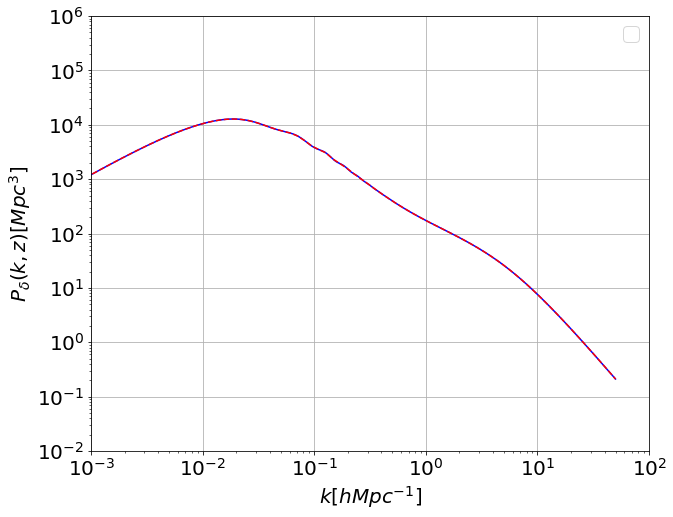

In [196]:
plt.figure(figsize=(10,8))
plt.plot(k_star, pk_matter, c="b")
plt.plot(k_g,pknl_g[5,:],c='r',ls='--')
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$k [h Mpc^{-1}]$")
plt.ylabel(r"$P_\delta(k,z) [Mpc^3]$")
plt.grid()
plt.xlim([1e-3,1e2])
plt.ylim([1e-2,1e6])
plt.legend();

# Test de generation de nouveau trainingset

In [169]:
from helper import *              # load/save   

In [170]:
root_dir = "./"

In [172]:
cosmologies = load_arrays(root_dir + 'trainingset/components', 'cosmologies')
print(f"Cosmo: nber of training Cosmo points {cosmologies.shape[0]} for {cosmologies.shape[1]} params")

Cosmo: nber of training Cosmo points 1000 for 5 params


In [173]:
cosmologies[0]

array([0.12616742, 0.02163407, 2.72607173, 1.15724975, 0.73022459])

In [205]:
def make_class_dict(cosmo):

    omega_c_emu = cosmo[0]    # omega_c h^2
    omega_b_emu = cosmo[1]   #omega_b h^2
    ln1010As_emu = cosmo[2]
    As_emu = 10**(-10)*np.exp(ln1010As_emu)
    n_s_emu = cosmo[3]
    h_emu = cosmo[4]
    
    class_dict_def ={
        'output': 'mPk',
        'A_s': As_emu,
        'n_s': n_s_emu, 
        'h': h_emu,
        'omega_b': omega_b_emu,
        'omega_cdm':omega_c_emu,
        'N_ncdm': 1.0, 
        'deg_ncdm': 3.0, 
        'T_ncdm': 0.71611, 
        'N_ur': 0.00641,
        'm_ncdm':0.02,
        'z_max_pk' : 4.66,
        'P_k_max_h/Mpc' : 50.,                 
        'halofit_k_per_decade' : 80.,
        'halofit_sigma_precision' : 0.05
    }
    class_dict_lin = class_dict_def.copy()
    class_dict_lin['non_linear'] = 'none'
    class_dict_nl = class_dict_def.copy()
    class_dict_nl['non_linear'] = 'halofit'
    
    return class_dict_lin, class_dict_nl

In [206]:
params_lin, params_nl = make_class_dict(cosmologies[0])

In [207]:
class_module_lin = Class()
class_module_lin.set(params_lin)
class_module_lin.compute()

class_module_nl = Class()
class_module_nl.set(params_nl)
class_module_nl.compute()

In [250]:
k_g = np.geomspace(5e-4,50,80, endpoint=True) #h/Mpc
z_g = np.linspace(0.,4.66,20, endpoint=True)

pklin = class_module_lin.get_pk_all(k_g*params_lin['h'],z_g) 
pknl = class_module_nl.get_pk_all(k_g*params_nl['h'],z_g) 

In [265]:
type(z_g[5]), type(pklin[0,0])

(numpy.float64, numpy.float64)

In [252]:
pklin.shape, pknl.shape

((20, 80), (20, 80))

In [253]:
pklin_z0 = pklin[0,:]

In [254]:
pklin_z0.shape

(80,)

In [284]:
growth0 = pklin[:,0]/pklin[0,0]

In [285]:
growth0.shape

(20,)

In [289]:
growth_grid = pklin/pklin[0,:]

In [290]:
growth_grid.shape

(20, 80)

In [291]:
mean_growth_grid = np.mean(growth_grid, axis=1)
std_growth_grid = np.std(growth_grid, axis=1)

<ErrorbarContainer object of 3 artists>

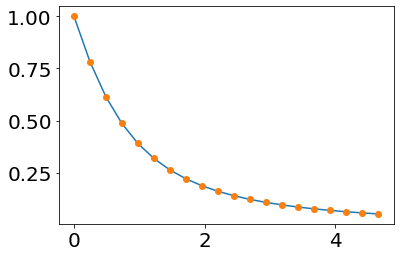

In [293]:
plt.plot(z_g,growth0)
plt.errorbar(z_g, mean_growth_grid,yerr=std_growth_grid, fmt='o')

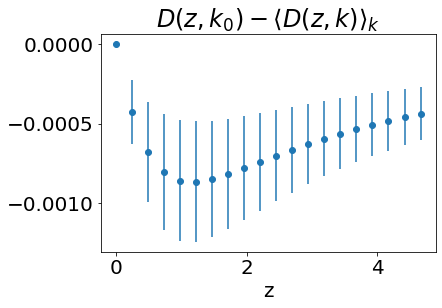

In [300]:
plt.errorbar(z_g, growth0-mean_growth_grid,yerr=std_growth_grid, fmt='o')
plt.xlabel("z")
plt.title(r"$D(z,k_0)-\langle D(z,k)\rangle_k$");

In [272]:
qfunc = pknl/pklin -1.0

In [273]:
qfunc.shape

(20, 80)

In [274]:
np.dot( growth.reshape(growth.shape[0],1), pklin_z0.reshape(1,pklin_z0.shape[0])).shape

(20, 80)

In [275]:
tmp1=(qfunc+1.0)*np.dot( growth.reshape(growth.shape[0],1), pklin_z0.reshape(1,pklin_z0.shape[0]))

In [260]:
tmp = (qfunc+1.0)*np.dot(pklin_z0.reshape(pklin_z0.shape[0],1), growth.reshape(1,growth.shape[0]))

In [276]:
tmp1-pknl

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -2.36448300e-02, -5.60458740e-02, ...,
        -9.38974367e-04, -7.02231522e-04, -5.28756328e-04],
       [ 0.00000000e+00, -3.94405862e-02, -9.43160663e-02, ...,
        -1.37012924e-03, -1.02141012e-03, -7.66641771e-04],
       ...,
       [-1.42108547e-14, -3.44755428e-02, -8.76233730e-02, ...,
        -8.19291281e-04, -6.30702578e-04, -4.85384407e-04],
       [ 0.00000000e+00, -3.28728911e-02, -8.36942048e-02, ...,
        -7.56634495e-04, -5.85297409e-04, -4.52358044e-04],
       [ 0.00000000e+00, -3.13714427e-02, -7.99998738e-02, ...,
        -6.97546356e-04, -5.42317882e-04, -4.21031740e-04]])

(array([  6.,  57., 160., 167., 174., 150., 160., 175., 213., 338.]),
 array([-1.23265143e-02, -1.10938628e-02, -9.86121141e-03, -8.62855999e-03,
        -7.39590856e-03, -6.16325713e-03, -4.93060571e-03, -3.69795428e-03,
        -2.46530285e-03, -1.23265143e-03,  1.38771609e-16]),
 <BarContainer object of 10 artists>)

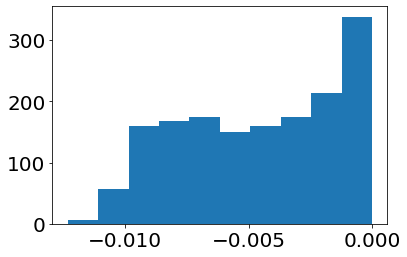

In [281]:
plt.hist(((tmp1-pknl)/pknl).flatten())

In [283]:
(qfunc +1)*pklin - pknl

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.11022302e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Transformation of As->sigma8 cosmologies

In [301]:
root_dir = "./"

In [303]:
# Original set {Omega_cdm h^2, Omega_b h^2, ln(10^10 As), ns, h}
cosmologies_Aslike = load_arrays(root_dir + 'trainingset', 'cosmologies')
print(f"Cosmo: nber of training Cosmo points {cosmologies_Aslike.shape[0]} for {cosmologies_Aslike.shape[1]} params")

Cosmo: nber of training Cosmo points 1000 for 5 params


In [306]:
cosmologies_Aslike.shape

(1000, 5)

In [312]:
#cosmologies_sig8like = cosmologies_Aslike.copy()
sig8_lin = []
sig8_nl = []
for ic, cosmo in enumerate(cosmologies_Aslike):
    if ic%10 == 0:
        print(f"Cosmo[{ic}]...")
    params_lin, params_nl = make_class_dict(cosmo)
    class_module_lin = Class()
    class_module_lin.set(params_lin)
    class_module_lin.compute()
    sig8_lin.append(class_module_lin.sigma8())
    
    class_module_nl = Class()
    class_module_nl.set(params_nl)
    class_module_nl.compute()
    sig8_nl.append(class_module_nl.sigma8())

    # Clean CLASS memory
    class_module_lin.struct_cleanup()
    class_module_lin.empty()
    class_module_nl.struct_cleanup()
    class_module_nl.empty()

Cosmo[0]...
Cosmo[10]...
Cosmo[20]...
Cosmo[30]...
Cosmo[40]...
Cosmo[50]...
Cosmo[60]...
Cosmo[70]...
Cosmo[80]...
Cosmo[90]...
Cosmo[100]...
Cosmo[110]...
Cosmo[120]...
Cosmo[130]...
Cosmo[140]...
Cosmo[150]...
Cosmo[160]...
Cosmo[170]...
Cosmo[180]...
Cosmo[190]...
Cosmo[200]...
Cosmo[210]...
Cosmo[220]...
Cosmo[230]...
Cosmo[240]...
Cosmo[250]...
Cosmo[260]...
Cosmo[270]...
Cosmo[280]...
Cosmo[290]...
Cosmo[300]...
Cosmo[310]...
Cosmo[320]...
Cosmo[330]...
Cosmo[340]...
Cosmo[350]...
Cosmo[360]...
Cosmo[370]...
Cosmo[380]...
Cosmo[390]...
Cosmo[400]...
Cosmo[410]...
Cosmo[420]...
Cosmo[430]...
Cosmo[440]...
Cosmo[450]...
Cosmo[460]...
Cosmo[470]...
Cosmo[480]...
Cosmo[490]...
Cosmo[500]...
Cosmo[510]...
Cosmo[520]...
Cosmo[530]...
Cosmo[540]...
Cosmo[550]...
Cosmo[560]...
Cosmo[570]...
Cosmo[580]...
Cosmo[590]...
Cosmo[600]...
Cosmo[610]...
Cosmo[620]...
Cosmo[630]...
Cosmo[640]...
Cosmo[650]...
Cosmo[660]...
Cosmo[670]...
Cosmo[680]...
Cosmo[690]...
Cosmo[700]...
Cosmo[710]...
Cos

In [314]:
sig8_lin_tmp = np.array(sig8_lin)
sig8_nl_tmp  = np.array(sig8_nl)

In [318]:
np.max(np.abs(sig8_lin_tmp-sig8_nl_tmp))

0.0

In [320]:
cosmologies_Aslike.shape

(1000, 5)

In [323]:
ln1010As = cosmologies_Aslike[:,2]

In [327]:
ln1010As.min(), ln1010As.max()

(1.7031250212248181, 4.99877704436248)

Text(0, 0.5, '$\\sigma_8$')

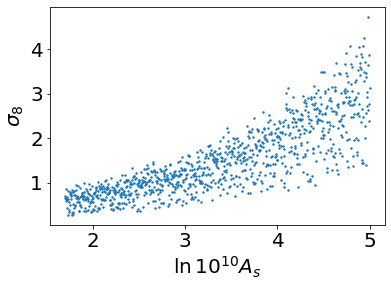

In [329]:
plt.scatter(ln1010As,sig8_nl, s=2)
plt.xlabel(r"$\ln 10^{10} A_s$")
plt.ylabel(r"$\sigma_8$")

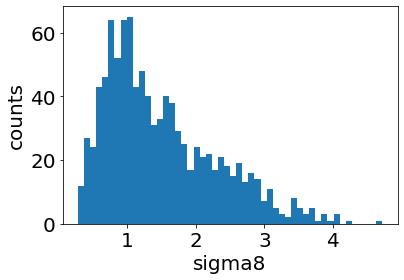

In [367]:
plt.hist(sig8_nl,bins=50);
plt.xlabel("sigma8")
plt.ylabel("counts");

In [382]:
sig8_nl_tmp.min(), sig8_nl_tmp.max()

(0.2764824180613023, 4.7229215385038925)

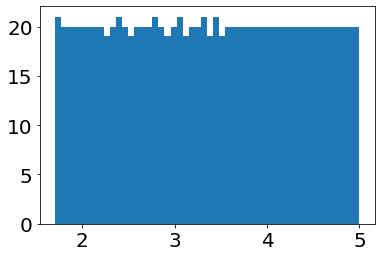

In [366]:
plt.hist(ln1010As,bins=50);

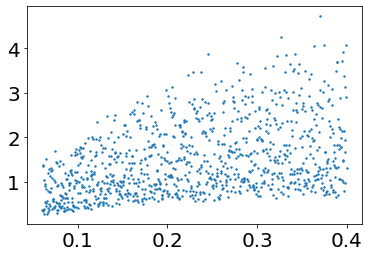

In [330]:
plt.scatter(cosmologies_Aslike[:,0],sig8_nl, s=2)

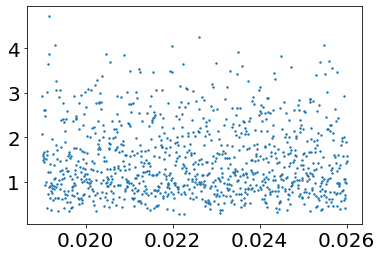

In [331]:
plt.scatter(cosmologies_Aslike[:,1],sig8_nl, s=2)

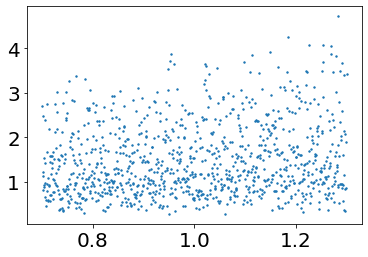

In [341]:
plt.scatter(cosmologies_Aslike[:,3],sig8_nl, s=2)

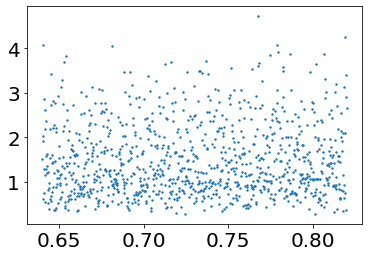

In [333]:
plt.scatter(cosmologies_Aslike[:,4],sig8_nl, s=2)

In [340]:
import arviz as az
import corner

In [337]:
#! pip install arviz

In [338]:
#! pip install corner

In [345]:
data={}
data['ln1010As']=cosmologies_Aslike[:,2]
data['sigma8']=sig8_nl_tmp
data['Omega_c']=cosmologies_Aslike[:,0]
data['Omega_b']=cosmologies_Aslike[:,1]
data['n_s']=cosmologies_Aslike[:,3]
data['h']=cosmologies_Aslike[:,4]

In [353]:
import arviz.labels as azl
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['blue'])
labeller = azl.MapLabeller(var_name_map={"Omega_c": r"$\Omega_c$", 
                                             "sigma8": r"$\sigma_8$",
                                             "h":r"$h$", "Omega_b": r"$\Omega_b$"})

/sps/lsst/users/campagne/anaconda3/envs/jaxccl/lib/python3.8/site-packages/arviz/stats/density_utils.py:249: RuntimeWarning: divide by zero encountered in double_scalars
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)


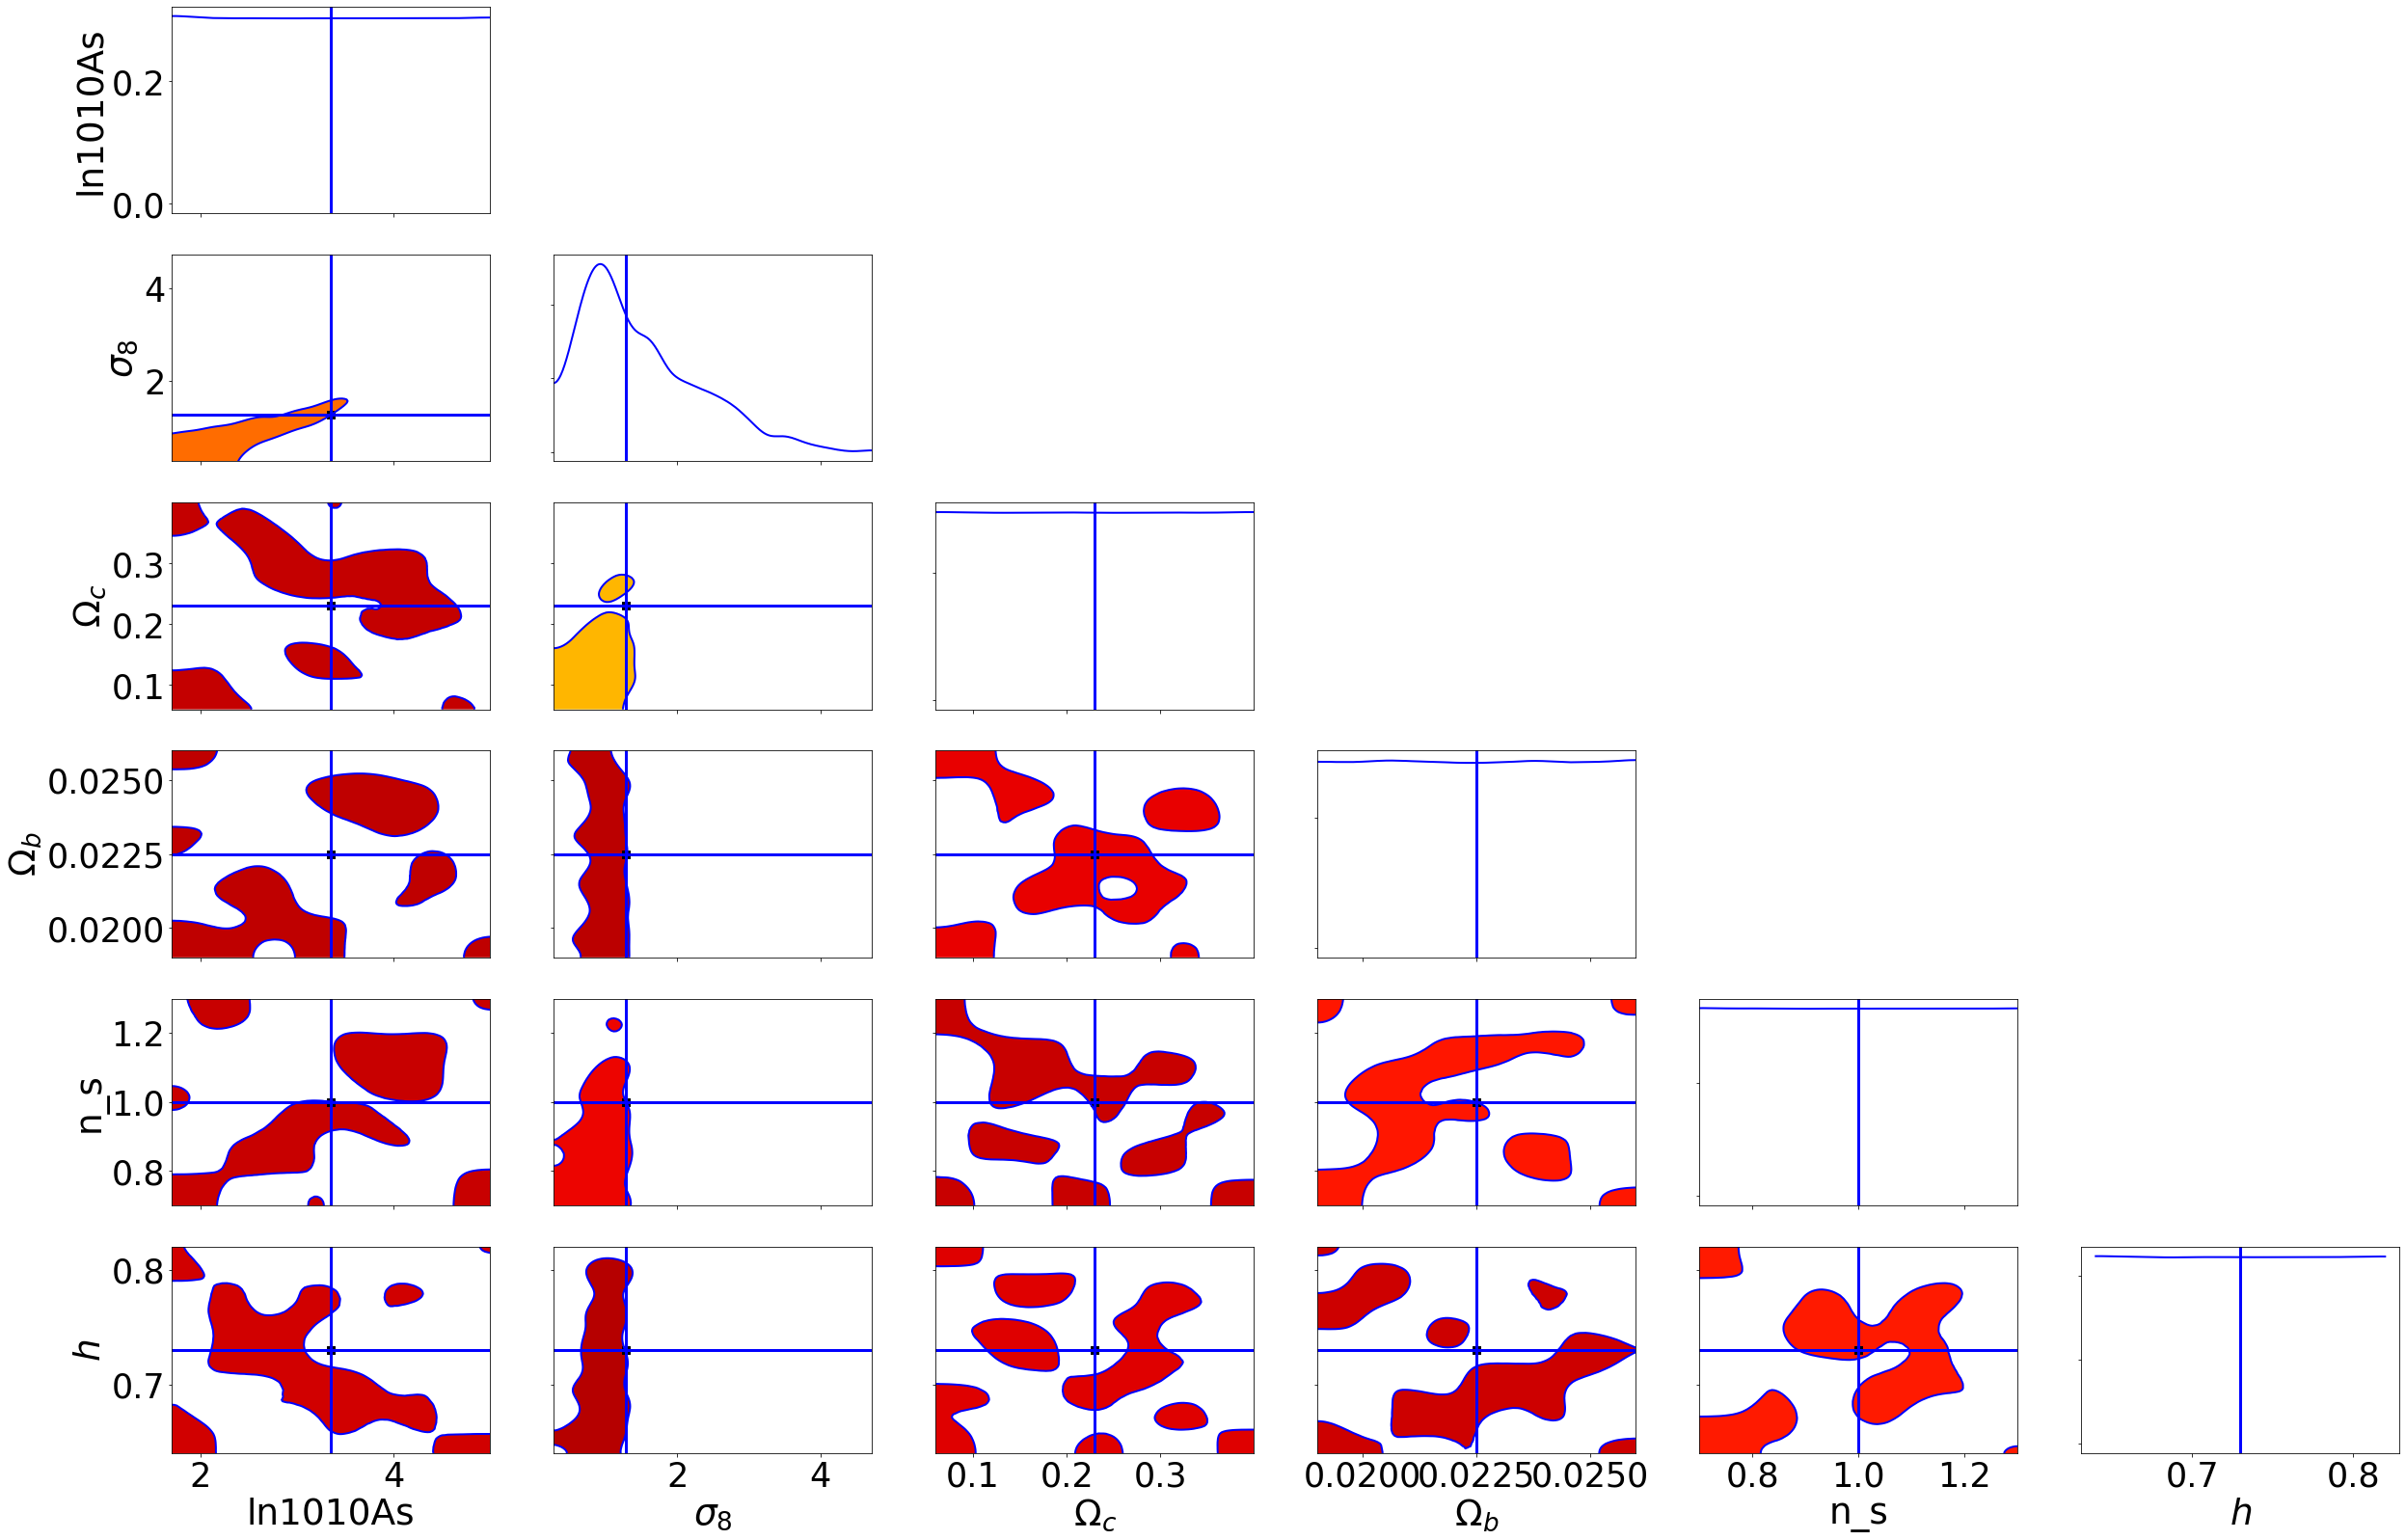

In [363]:
axes1= az.plot_pair(
        data,
        kind="kde",
        labeller=labeller,
#        var_names=var_nm,
        marginal_kwargs={"plot_kwargs": {"lw":2, "c":'b', "ls":"-"}},
        kde_kwargs={
            "hdi_probs": [0.3],  # Plot 68% and 90% HDI contours
            #"hdi_probs":[0.393, 0.865, 0.989],  # 1, 2 and 3 sigma contours
            "contour_kwargs":{"colors":None, "cmap":cmap1, "linewidths":2,
                              "linestyles":"-"},
            "contourf_kwargs":{"alpha":1},
        },
        point_estimate_kwargs={"lw": 3, "c": "b"},
        marginals=True, textsize=35, point_estimate='median',
    );

In [358]:
cosmologies_sigma8 = cosmologies_Aslike.copy()

In [359]:
cosmologies_sigma8[:,2] = sig8_lin_tmp

In [360]:
pwd

'/sps/lsst/users/campagne/Jemu'

In [362]:
np.save(root_dir+"/trainingset/"+"cosmologies_sig8.npz",cosmologies_sigma8)

# Generate cosmologies from Latin Hypercube 5D

In [368]:
import scipy

In [370]:
dist=scipy.stats.uniform(loc=1,scale=2)

In [371]:
dist.ppf(0.1)

1.2

In [372]:
def scale(t,loc,scale):
    return loc + t * (scale)

In [373]:
scale(0.1,1,2)

1.2

In [374]:
import pandas as pd

In [378]:
pwd

'/sps/lsst/users/campagne/Jemu'

In [380]:
latHypSpl = pd.read_csv('/sps/lsst/users/campagne/emuPK/emulator/'+ 'lhs/' + 'maximin_1000_5D', index_col=0).values

In [387]:
latHypSpl.shape

(1000, 5)

In [383]:
# Uniform(loc,scale) => uniform dist in [loc, loc+scale]

In [385]:
(0.25, 4.-0.25)

(0.25, 3.75)

In [386]:
priors = {
    'omega_cdm': {'distribution': 'uniform', 'specs': [0.06, 0.34]},    # [0.06, 0.40]
    'omega_b':   {'distribution': 'uniform', 'specs': [0.019, 0.007]},  # [0.019, 0.026]
    'sigma8':    {'distribution': 'uniform', 'specs': [0.25, 3.0]},     # [0.25, 3.25]
    'n_s':       {'distribution': 'uniform', 'specs': [0.70, 0.60]},    # [0.7, 1.3]
    'h':         {'distribution': 'uniform', 'specs': [0.64, 0.18]}     # [0.64, 0.82]
}

In [388]:
new_cosmo = np.zeros_like(latHypSpl)

In [389]:
tmp = priors['omega_cdm']

In [397]:
eval('scipy.stats.'+tmp['distribution'])(*tmp['specs'])

In [400]:
stats = {}

for c in priors:
    tmp = priors[c]
    stats[c] = eval('scipy.stats.'+tmp['distribution'])(*tmp['specs'])

In [401]:
stats

{'omega_cdm': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fcc8c48e700>,
 'omega_b': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fcc8c48ebe0>,
 'sigma8': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fcc8c4a8f10>,
 'n_s': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fcc8c4a8370>,
 'h': <scipy.stats._distn_infrastructure.rv_frozen at 0x7fcc8c4a87f0>}

In [403]:
new_cosmo = np.zeros_like(latHypSpl)
for i,p in enumerate(priors):
    new_cosmo[:,i] = stats[p].ppf(latHypSpl[:,i])

In [404]:
new_cosmo

array([[0.12616742, 0.02163407, 1.18279248, 1.15724975, 0.73022459],
       [0.29972099, 0.02306631, 2.30523194, 0.86839526, 0.70286242],
       [0.13884111, 0.02485885, 1.58958545, 1.11576076, 0.76722837],
       ...,
       [0.38322584, 0.02537082, 2.92673794, 0.80712803, 0.64501174],
       [0.06389384, 0.01991875, 1.27428548, 1.28515481, 0.64342292],
       [0.2368161 , 0.02314526, 1.39656194, 0.95206408, 0.80532434]])

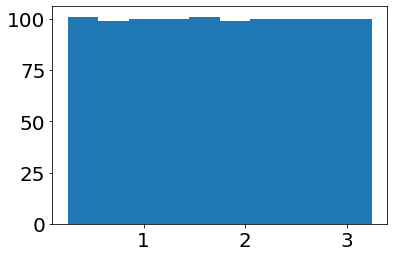

In [413]:
plt.hist(new_cosmo[:,2]);

In [414]:
np.savez(root_dir+"/trainingset/"+"cosmologies_sig8.npz",new_cosmo)

In [415]:
cosmologies[0]

array([0.12616742, 0.02163407, 2.72607173, 1.15724975, 0.73022459])

In [416]:
params_lin, params_nl = make_class_dict(cosmologies[0])

In [417]:
class_module_lin = Class()
class_module_lin.set(params_lin)
class_module_lin.compute()

In [419]:
k_g = np.geomspace(5e-4,50,40, endpoint=True) #h/Mpc
z_g = np.linspace(0.,4.66,20, endpoint=True)

In [423]:
pklin_all=class_module_lin.get_pk_all(k_g*params_lin['h'],z_g)

In [430]:
pklin_all.shape

(20, 40)

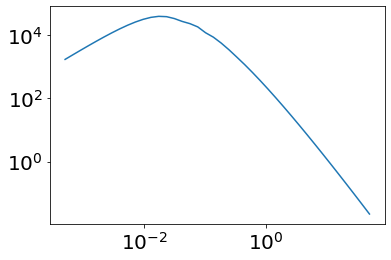

In [428]:
plt.plot(k_g,pklin_all[0,:])
plt.yscale("log")
plt.xscale("log")

In [431]:
pklin0=pklin_all[0,:]

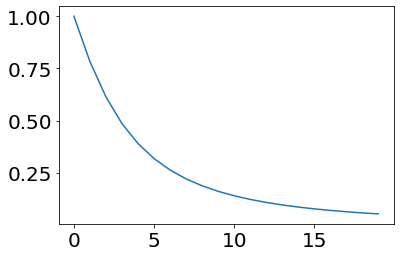

In [433]:
plt.plot(pklin_all[:,0]/pklin0[0])

In [436]:
pklin_all[:,0]/pklin0[0]

array([1.        , 0.7826932 , 0.61344526, 0.485736  , 0.39012228,
       0.31814933, 0.26332409, 0.22095185, 0.18770834, 0.16124444,
       0.13988824, 0.12243601, 0.10800944, 0.09595867, 0.08579635,
       0.07715206, 0.06974085, 0.06334086, 0.05777751, 0.05291202])

In [434]:
pklin0_bis = np.array([class_module_lin.pk_lin(k_g[k] * params_lin['h'], 0.0) for k in range(40)])

In [435]:
pklin0_bis/pklin0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

# Dev > 16 June 22

In [6]:
from helper import *   
import jax_cosmo as jc

In [54]:
import scipy.interpolate as itp

In [4]:
root_dir = "./"

In [67]:
# {Omega_cdm h^2, Omega_b h^2, sigma8, ns, h}
cosmologies = load_arrays(root_dir + 'trainingset/components_sig8_120x20', 'cosmo_validated')
print(f"Cosmo: nber of training Cosmo points {cosmologies.shape[0]} for {cosmologies.shape[1]} params")

Cosmo: nber of training Cosmo points 1000 for 5 params


In [68]:
def emu2jc(theta):
    omega_c_emu, omega_b_emu, sigma8_emu, n_s_emu, h_emu = theta 
    
    return jc.Cosmology(Omega_c=omega_c_emu/h_emu**2, 
                 Omega_b=omega_b_emu/h_emu**2, 
                 h=h_emu, 
                 n_s=n_s_emu,
                 sigma8=sigma8_emu,   
                 Omega_k=0.,
                 w0=-1.0,
                 wa=0.0)

In [69]:
omega_c_arr = []
omega_b_arr = []
Omega_c_arr = []
Omega_b_arr = []
h_arr = []
sigma8_arr = []
Omega_m_arr = []   # secondary param
Omega_de_arr = []  #   "
ns_arr = []
for ic, cosmo in enumerate(cosmologies):
    if ic%100 == 0:
        print(f"Cosmo[{ic}]...")
    cosmo_jc = emu2jc(cosmo)
    omega_c_arr.append(cosmo_jc.Omega_c * cosmo_jc.h**2)
    omega_b_arr.append(cosmo_jc.Omega_b * cosmo_jc.h**2)
    Omega_c_arr.append(cosmo_jc.Omega_c)
    Omega_b_arr.append(cosmo_jc.Omega_b)
    h_arr.append(cosmo_jc.h)
    ns_arr.append(cosmo_jc.n_s)
    sigma8_arr.append(cosmo_jc.sigma8)
    Omega_m_arr.append(cosmo_jc.Omega_m)
    Omega_de_arr.append(cosmo_jc.Omega_de)

Cosmo[0]...
Cosmo[100]...
Cosmo[200]...
Cosmo[300]...
Cosmo[400]...
Cosmo[500]...
Cosmo[600]...
Cosmo[700]...
Cosmo[800]...
Cosmo[900]...


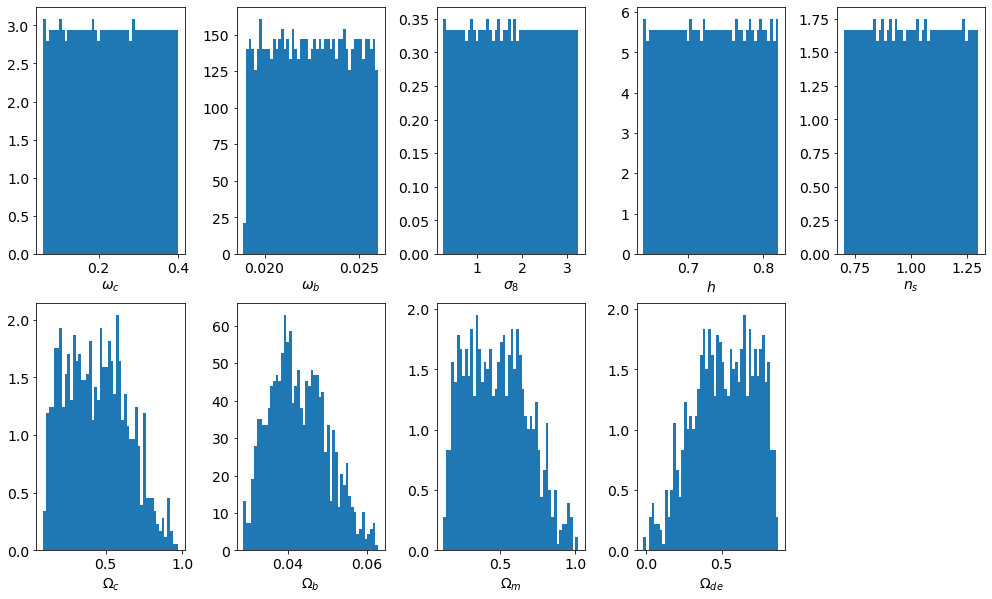

In [71]:
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 14
fig,axs=plt.subplots(2,5,figsize=(17,10), gridspec_kw={"wspace":0.35})

axs[0,0].hist(omega_c_arr, bins=50, density=True);
axs[0,0].set_xlabel("$\omega_c$");
axs[0,1].hist(omega_b_arr, bins=50, density=True);
axs[0,1].set_xlabel("$\omega_b$");
axs[0,2].hist(sigma8_arr, bins=50, density=True);
axs[0,2].set_xlabel("$\sigma_8$");
axs[0,3].hist(h_arr, bins=50, density=True);
axs[0,3].set_xlabel("$h$");
axs[0,4].hist(ns_arr, bins=50, density=True);
axs[0,4].set_xlabel("$n_s$");

axs[1,0].hist(Omega_c_arr, bins=50, density=True);
axs[1,0].set_xlabel("$\Omega_c$");
axs[1,1].hist(Omega_b_arr, bins=50, density=True);
axs[1,1].set_xlabel("$\Omega_b$");
axs[1,2].hist(Omega_m_arr, bins=50, density=True);
axs[1,2].set_xlabel("$\Omega_m$");
axs[1,3].hist(Omega_de_arr, bins=50, density=True);
axs[1,3].set_xlabel("$\Omega_{de}$");

fig.delaxes(axs[1,4])


In [72]:
def make_class_dict(cosmo):

    omega_c_emu = cosmo[0]    # omega_c h^2
    omega_b_emu = cosmo[1]   #omega_b h^2
    sigma8_emu  = cosmo[2]
    n_s_emu = cosmo[3]
    h_emu = cosmo[4]
    
    class_dict_def ={
        'output': 'mPk',
        'sigma8': sigma8_emu,
        'n_s': n_s_emu, 
        'h': h_emu,
        'omega_b': omega_b_emu,
        'omega_cdm':omega_c_emu,
        'N_ncdm': 1.0, 
        'deg_ncdm': 3.0, 
        'T_ncdm': 0.71611, 
        'N_ur': 0.00641,
        'm_ncdm':0.02,
        'z_max_pk' : 4.66,
        'P_k_max_h/Mpc' : 50.,                 
        'halofit_k_per_decade' : 80.,
        'halofit_sigma_precision' : 0.05
    }
    class_dict_lin = class_dict_def.copy()
    class_dict_lin['non_linear'] = 'none'
    class_dict_nl = class_dict_def.copy()
    class_dict_nl['non_linear'] = 'halofit'
    
    return class_dict_lin, class_dict_nl

In [73]:
As_arr = []
k_pivot = 0.05 # default CLASS 
# As := Exp[ln(P_primodial(k=k_pivot))]
for ic, cosmo in enumerate(cosmologies):
    if ic%100 == 0:
        print(f"Cosmo[{ic}]...")

    params_lin, params_nl = make_class_dict(cosmo)
    class_module_lin = Class()
    class_module_lin.set(params_lin)
    class_module_lin.compute()
    
    pk_primo = class_module_lin.get_primordial()  #
    spline = itp.splrep(pk_primo['k [1/Mpc]'], pk_primo['P_scalar(k)'])
    As = itp.splev(k_pivot, spline).item()*1e9
    As_arr.append(As)
    
    class_module_lin.struct_cleanup()
    class_module_lin.empty()

Cosmo[0]...
Cosmo[100]...
Cosmo[200]...
Cosmo[300]...
Cosmo[400]...
Cosmo[500]...
Cosmo[600]...
Cosmo[700]...
Cosmo[800]...
Cosmo[900]...


In [ ]:
def plot_loghist(x, bins, ax):
  hist, bins = np.histogram(x, bins=bins)
  logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
  ax.hist(x, bins=logbins)
  ax.set_xscale('log')

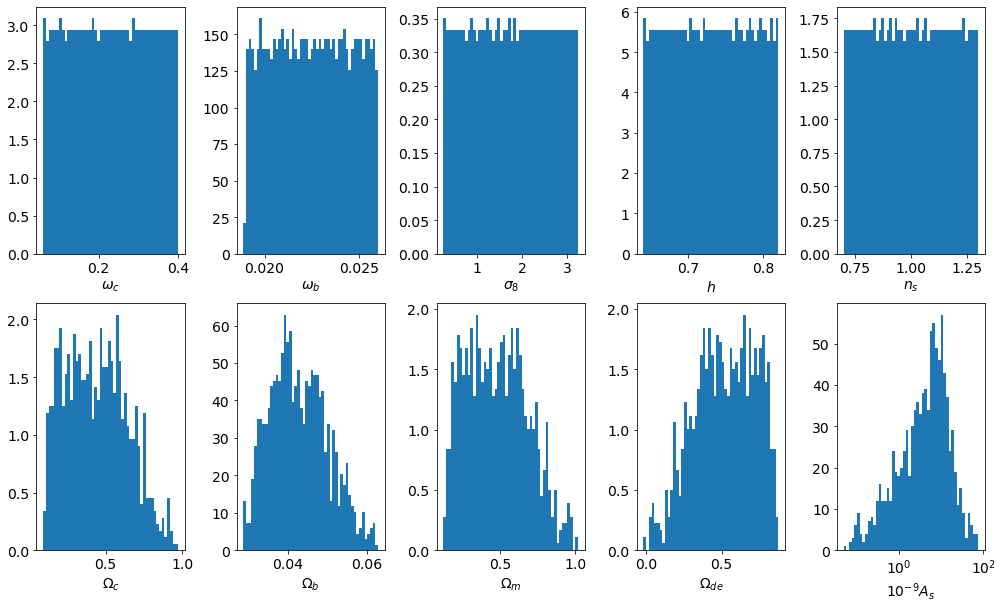

In [76]:
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 14
fig,axs=plt.subplots(2,5,figsize=(17,10), gridspec_kw={"wspace":0.35})

axs[0,0].hist(omega_c_arr, bins=50, density=True);
axs[0,0].set_xlabel("$\omega_c$");
axs[0,1].hist(omega_b_arr, bins=50, density=True);
axs[0,1].set_xlabel("$\omega_b$");
axs[0,2].hist(sigma8_arr, bins=50, density=True);
axs[0,2].set_xlabel("$\sigma_8$");
axs[0,3].hist(h_arr, bins=50, density=True);
axs[0,3].set_xlabel("$h$");
axs[0,4].hist(ns_arr, bins=50, density=True);
axs[0,4].set_xlabel("$n_s$");

axs[1,0].hist(Omega_c_arr, bins=50, density=True);
axs[1,0].set_xlabel("$\Omega_c$");
axs[1,1].hist(Omega_b_arr, bins=50, density=True);
axs[1,1].set_xlabel("$\Omega_b$");
axs[1,2].hist(Omega_m_arr, bins=50, density=True);
axs[1,2].set_xlabel("$\Omega_m$");
axs[1,3].hist(Omega_de_arr, bins=50, density=True);
axs[1,3].set_xlabel("$\Omega_{de}$");
#axs[1,4].hist(As_arr, bins=50, density=True);

hist, bins = np.histogram(As_arr, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[1,4].hist(As_arr, bins=logbins)
axs[1,4].set_xlabel("$10^{-9}A_s$");
axs[1,4].set_xscale("log")

# Try DES Y3 

In [84]:
import pandas as pd
import scipy

In [81]:
latHypSpl = pd.read_csv('/sps/lsst/users/campagne/emuPK/emulator/'+ 'lhs/' + 'maximin_1000_5D', index_col=0).values

In [177]:
priors = {
    'Omega_cdm': {'distribution': 'uniform', 'specs': [0.1, 0.4]},    # [0.1, 0.5]
    'Omega_b':   {'distribution': 'uniform', 'specs': [0.04, 0.02]},  # [0.04, 0.06]
    'sigma8':    {'distribution': 'uniform', 'specs': [0.7, 0.2]},     # [0.7, 0.9]
    'n_s':       {'distribution': 'uniform', 'specs': [0.87, 0.19]},    # [0.87, 1.06]
    'h':         {'distribution': 'uniform', 'specs': [0.55, 0.25]}     # [0.55, 0.8]
}

In [178]:
priors.keys()

dict_keys(['Omega_cdm', 'Omega_b', 'sigma8', 'n_s', 'h'])

In [179]:
stats = {}
for c in priors:
    tmp = priors[c]
    stats[c] = eval('scipy.stats.'+tmp['distribution'])(*tmp['specs'])

In [180]:
new_cosmo = np.zeros_like(latHypSpl)
for i,p in enumerate(priors):
    new_cosmo[:,i] = stats[p].ppf(latHypSpl[:,i])

In [181]:
new_cosmo

array([[0.17784402, 0.04752592, 0.76218617, 1.01479575, 0.67531193],
       [0.3820247 , 0.05161802, 0.83701546, 0.92332517, 0.63730892],
       [0.19275425, 0.05673958, 0.7893057 , 1.00165758, 0.72670607],
       ...,
       [0.48026569, 0.05820234, 0.8784492 , 0.90392388, 0.55696075],
       [0.10458098, 0.04262499, 0.7682857 , 1.05529902, 0.55475406],
       [0.30801894, 0.0518436 , 0.77643746, 0.94982029, 0.77961714]])

In [182]:
np.argmax(new_cosmo[:,1] * (new_cosmo[:,4]**2))

863

In [183]:
new_cosmo[863]

array([0.17659016, 0.05979349, 0.89697971, 0.88801324, 0.79516363])

In [184]:
def make_class_dict(cosmo):

    Omega_c_emu = cosmo[0]
    Omega_b_emu = cosmo[1]
    #As_emu  = cosmo[2] * 10**(-9)
    sigma8_emu = cosmo[2]
    n_s_emu = cosmo[3]
    h_emu = cosmo[4]
    
    class_dict_def ={
        'output': 'mPk',
        'sigma8': sigma8_emu,
        'n_s': n_s_emu, 
        'h': h_emu,
        'Omega_b': Omega_b_emu,              #### Omega and not omega=Omega h^2
        'Omega_cdm': Omega_c_emu,            #### idem
        'N_ncdm': 1.0, 
        'deg_ncdm': 3.0, 
        'T_ncdm': 0.71611, 
        'N_ur': 0.00641,
        'm_ncdm':0.02,
        'z_max_pk' : 4.66,
        'P_k_max_h/Mpc' : 50.,                 
        'halofit_k_per_decade' : 80.,
        'halofit_sigma_precision' : 0.05
    }
    class_dict_lin = class_dict_def.copy()
    class_dict_lin['non_linear'] = 'none'
    
    return class_dict_lin

In [201]:
As_arr = []
k_pivot = 0.05 # default CLASS 
# As := Exp[ln(P_primodial(k=k_pivot))]
for ic, cosmo in enumerate(cosmologies):
    if ic%100 == 0:
        print(f"Cosmo[{ic}]...")

    params_lin = make_class_dict(cosmo)
    class_module_lin = Class()
    class_module_lin.set(params_lin)
    class_module_lin.compute()
    
    pk_primo = class_module_lin.get_primordial()  #
    spline = itp.splrep(pk_primo['k [1/Mpc]'], pk_primo['P_scalar(k)'])
    As = itp.splev(k_pivot, spline).item()*1e9
    As_arr.append(As)
    
    class_module_lin.struct_cleanup()
    class_module_lin.empty()

Cosmo[0]...
Cosmo[100]...
Cosmo[200]...
Cosmo[300]...
Cosmo[400]...
Cosmo[500]...
Cosmo[600]...
Cosmo[700]...
Cosmo[800]...
Cosmo[900]...


In [165]:
"""
sig8_arr = []
for ic, cosmo in enumerate(new_cosmo):
    if ic%100 == 0:
        print(f"Cosmo[{ic}]...")

    params_lin  = make_class_dict(cosmo)
    #print(f"omega_b[{ic}]=",params_lin['Omega_b']*params_lin['h']**2)
    
    class_module_lin = Class()
    class_module_lin.set(params_lin)
    class_module_lin.compute()
    
    sig8 = class_module_lin.sigma8()
    sig8_arr.append(sig8)
    
    class_module_lin.struct_cleanup()
    class_module_lin.empty()
"""

'\nsig8_arr = []\nfor ic, cosmo in enumerate(new_cosmo):\n    if ic%100 == 0:\n        print(f"Cosmo[{ic}]...")\n\n    params_lin  = make_class_dict(cosmo)\n    #print(f"omega_b[{ic}]=",params_lin[\'Omega_b\']*params_lin[\'h\']**2)\n    \n    class_module_lin = Class()\n    class_module_lin.set(params_lin)\n    class_module_lin.compute()\n    \n    sig8 = class_module_lin.sigma8()\n    sig8_arr.append(sig8)\n    \n    class_module_lin.struct_cleanup()\n    class_module_lin.empty()\n'

In [203]:
def emu2jc(theta):
    Omega_c_emu, Omega_b_emu, sigma8_emu, n_s_emu, h_emu = theta 
    
    return jc.Cosmology(Omega_c=Omega_c_emu, 
                 Omega_b=Omega_b_emu, 
                 h=h_emu, 
                 n_s=n_s_emu,
                 sigma8=sigma8_emu,   
                 Omega_k=0.,
                 w0=-1.0,
                 wa=0.0)

In [204]:
omega_c_arr = []
omega_b_arr = []
Omega_c_arr = []
Omega_b_arr = []
h_arr = []
sigma8_arr = []
Omega_m_arr = []
Omega_de_arr = []
ns_arr = []
for ic, cosmo in enumerate(new_cosmo):
    if ic%100 == 0:
        print(f"Cosmo[{ic}]...")
#####    cosmo[2] = sig8_arr[ic]         ######## 
    cosmo_jc = emu2jc(cosmo)
    omega_c_arr.append(cosmo_jc.Omega_c * cosmo_jc.h**2)
    omega_b_arr.append(cosmo_jc.Omega_b * cosmo_jc.h**2)
    Omega_c_arr.append(cosmo_jc.Omega_c)
    Omega_b_arr.append(cosmo_jc.Omega_b)
    h_arr.append(cosmo_jc.h)
    ns_arr.append(cosmo_jc.n_s)
    sigma8_arr.append(cosmo_jc.sigma8)
    Omega_m_arr.append(cosmo_jc.Omega_m)
    Omega_de_arr.append(cosmo_jc.Omega_de)

Cosmo[0]...
Cosmo[100]...
Cosmo[200]...
Cosmo[300]...
Cosmo[400]...
Cosmo[500]...
Cosmo[600]...
Cosmo[700]...
Cosmo[800]...
Cosmo[900]...


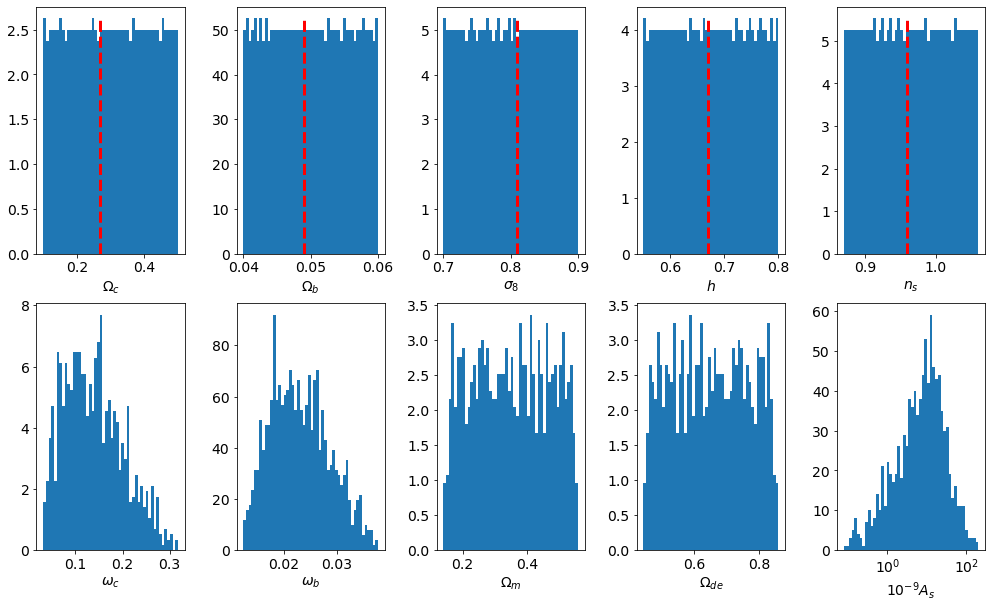

In [209]:
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 14
fig,axs=plt.subplots(2,5,figsize=(17,10), gridspec_kw={"wspace":0.35})

n,_,_=axs[0,0].hist(Omega_c_arr, bins=50, density=True);
axs[0,0].set_xlabel("$\Omega_c$");
omega_c_fidu=0.12
h_fidu=0.67
Omega_c_fidu = omega_c_fidu/h_fidu**2
axs[0,0].plot([Omega_c_fidu,Omega_c_fidu],[0,np.max(n)],c='r',ls="--",lw=3)

n,_,_=axs[0,1].hist(Omega_b_arr, bins=50, density=True);
axs[0,1].set_xlabel("$\Omega_b$");
omega_b_fidu=0.022
Omega_b_fidu = omega_b_fidu/h_fidu**2
axs[0,1].plot([Omega_b_fidu,Omega_b_fidu],[0,np.max(n)],c='r',ls="--",lw=3)

n,_,_=axs[0,2].hist(sigma8_arr, bins=50, density=True);
axs[0,2].set_xlabel("$\sigma_8$");
sigma8_fidu=0.81
axs[0,2].plot([sigma8_fidu,sigma8_fidu],[0,np.max(n)],c='r',ls="--",lw=3)


n,_,_=axs[0,3].hist(h_arr, bins=50, density=True);
axs[0,3].set_xlabel("$h$");
axs[0,3].plot([h_fidu,h_fidu],[0,np.max(n)],c='r',ls="--",lw=3)

n,_,_=axs[0,4].hist(ns_arr, bins=50, density=True);
axs[0,4].set_xlabel("$n_s$");
ns_fidu = 0.96
axs[0,4].plot([ns_fidu,ns_fidu],[0,np.max(n)],c='r',ls="--",lw=3)


axs[1,0].hist(omega_c_arr, bins=50, density=True);
axs[1,0].set_xlabel("$\omega_c$");
axs[1,1].hist(omega_b_arr, bins=50, density=True);
axs[1,1].set_xlabel("$\omega_b$");

axs[1,2].hist(Omega_m_arr, bins=50, density=True);
axs[1,2].set_xlabel("$\Omega_m$");
axs[1,3].hist(Omega_de_arr, bins=50, density=True);
axs[1,3].set_xlabel("$\Omega_{de}$");

##axs[1,4].hist(As_arr, bins=50, density=True);
#axs[1,4].hist(new_cosmo[:,2], bins=50, density=True)
##axs[1,4].set_xlabel("$10^{-9}A_s$");
##axs[1,4].set_xscale("log")

hist, bins = np.histogram(As_arr, bins=50, density=True)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axs[1,4].hist(As_arr, bins=logbins)
axs[1,4].set_xlabel("$10^{-9}A_s$");
axs[1,4].set_xscale("log")